In [9]:
import numpy as np
import math
from utils import *
import matplotlib.pyplot as plt
#Problem Statement
"""Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits"""
# x_train is the population of a city
# y_train is the profit of a restaurant in that city. A negative value for profit indicates a loss.

x_train,y_train = load_data()
print(f"Type of x_train and its 5 values are : {type(x_train)} \n {x_train[:5]}")
print(f"Type of y_train and its 5 values are : {type(y_train)} \n {y_train[:5]}")
print(f"Length : {len(x_train)} and {len(y_train)} \n Shape of x and y sets : {x_train.shape} and {y_train.shape})")  #1D arrays with only 1 row and 1 column


Type of x_train and its 5 values are : <class 'numpy.ndarray'> 
 [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of y_train and its 5 values are : <class 'numpy.ndarray'> 
 [17.592   9.1302 13.662  11.854   6.8233]
Length : 97 and 97 
 Shape of x and y sets : (97,) and (97,))


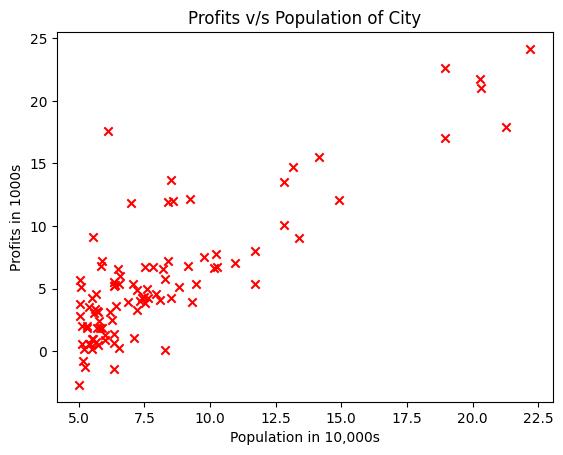

In [14]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits v/s Population of City")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profits in 1000s")
plt.show()
# Your goal is to build a linear regression model to fit this data.
# With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

In [19]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
               """
    dimension = x.shape[0]
    total_cost = 0
    cost = 0
    for i in range(dimension):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i])**2
        total_cost = total_cost + cost
    total_cost = total_cost/(2*dimension)
    return total_cost
    

In [21]:
init_w = 2
init_b = 1
cost = compute_cost(x_train, y_train , init_w , init_b)
print(f"Total Cost is : {cost}")
from public_tests import *
compute_cost_test(compute_cost)

Total Cost is : 75.20338497891959
All tests passed!


In [25]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    dimension = x.shape[0]
    dj_dw = 0
    dj_db = 0
    cost = 0
    for i in range(dimension):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i])
        dj_dw =dj_dw + cost*x[i]
        dj_db = dj_db + cost
    dj_dw = dj_dw/dimension
    dj_db = dj_db/dimension
    return dj_dw,dj_db

In [26]:
init_w = 0
init_b = 0
dj_dw,dj_db = compute_gradient(x_train,y_train,init_w,init_b)
print(f" The gradient dj_dw : {dj_dw} and dj_db is : {dj_db}")
compute_gradient_test(compute_gradient)

 The gradient dj_dw : -65.32884974555672 and dj_db is : -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [27]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [30]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    dimension = x.shape[0]
    J_history = []
    w_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        w = w - alpha* dj_dw
        b = b - alpha*dj_db

        if i<10000:
            cost = cost_function(x,y,w,b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [34]:
w = 0
b = 0
alpha = 0.01
num_iters = 1500
w,b,J_history,w_history = gradient_descent(x_train, y_train, w, b, compute_cost, compute_gradient, alpha, num_iters)
print(f"w : {w} and b : {b}")

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w : 1.166362350335582 and b : -3.63029143940436


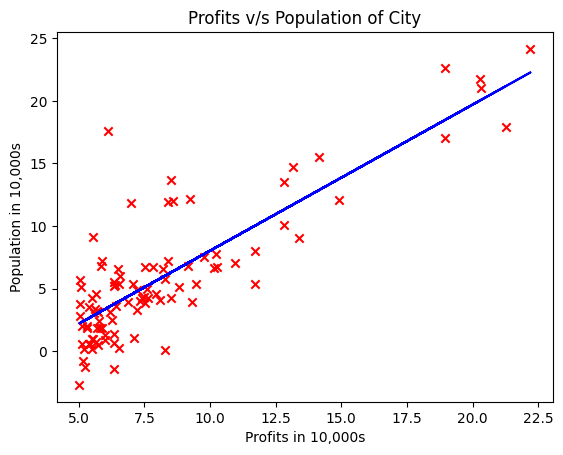

In [42]:
m = len(x_train)
predicted_y = np.zeros(m)
for i in range(m):
    predicted_y[i] = w*x_train[i] + b
plt.plot(x_train,predicted_y,c='b')
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits v/s Population of City")
plt.xlabel("Profits in 10,000s")
plt.ylabel("Population in 10,000s")
plt.show()